In [1]:
import numpy as np 
import pandas as pd 
import skimage.io
import matplotlib.pyplot as plt 
from numpy.random import randint as rd 
import auxiliar as ax 
from os import listdir
from os.path import isfile, join

In [2]:
df = pd.read_csv(r'C:\Users\abade\Documents\8 - Github\Biometric-system\data\demo_attributes_frgc.csv')

df = df[df.columns[:-2]]
print(df.Sex.value_counts()) 
print()
print(df.Race.value_counts())
print()
print(df.Age.value_counts())
print()
df['Skin Type'].value_counts()

male      807
female    633
Name: Sex, dtype: int64

caucasian    913
asian        332
hispanic     111
indian        35
arabic        28
black         21
Name: Race, dtype: int64

middle          519
young           477
young-middle    415
old              20
middle-old        9
Name: Age, dtype: int64



2      699
4      329
1-2    132
3      114
2-3     60
3-4     30
5       28
1       18
4-5     15
5-6      6
6        6
2-4      3
Name: Skin Type, dtype: int64

<AxesSubplot:>

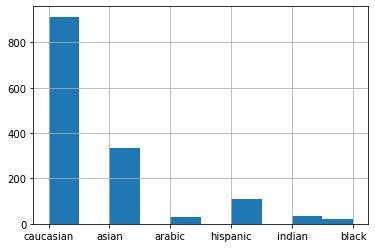

In [13]:
df.Race.hist()

In [84]:
# Specify conditions 
sex = 'male'
race = 'caucasian'
skin = '2'
age = 'young'

# Select based on condition 
df_tmp = df[(df.Sex == 'male') & (df.Age == 'young') & (df.Race == 'caucasian') & (df['Skin Type'] == '2')]
df_tmp

,Name,Sex,Race,Skin Type,Age
4,04201d132.png,male,caucasian,2,young
5,04201d380.png,male,caucasian,2,young
6,04201d426.png,male,caucasian,2,young
16,04212d140.png,male,caucasian,2,young
17,04212d209.png,male,caucasian,2,young
...,...,...,...,...,...
1165,04829d68.png,male,caucasian,2,young
1166,04829d94.png,male,caucasian,2,young
1184,04838d100.png,male,caucasian,2,young
1185,04838d20.png,male,caucasian,2,young


KeyError: 1185

In [54]:
np.random.choice(df.index.values, 1, replace=False)[0]

1089

In [45]:
r_counter = 0
for a1, a2, in a:
    
    if a2 <= 300:
        a[r_counter, 1] = np.random.choice(df.index.values, 1, replace=False)
    r_counter += 1

a

array([[ 815,  452],
       [ 200, 1412],
       [ 543,  504]], dtype=int64)

In [73]:
df.index.values

array([   0,    1,    2, ..., 1437, 1438, 1439], dtype=int64)

In [5]:
# # Select a random number of pairs photos based on condition 
# n = 2

# # Select n random photos
# rows = np.random.choice(df_tmp.index.values, n)

# # Locate the interested rows 
# df_tmp = df_tmp.loc[rows]

# # select unique to sotre it as a string
# photos = df_tmp.Name.unique()
# photos, rows

In [ ]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [76]:
def selec_pair_idx(dataframe:pd.DataFrame, n:int, subjects:int, thresh:int, reference_path, probes_path):
    """
    Given a dataframe and n number of pairs, select n radom pairs from the dataframe

    ATRIBUTES
    --------
    dataframe: Orginial Pandas Data Frame
    df_cond: Data Frame with the conditions 
    n: number of pairs

    RETURNS
    -------
    idx: tuple of pairs of indexes
    """
    rows = np.random.choice(dataframe.index.values, n*subjects, replace=False)
    selected_r = rows.reshape((n,subjects))

    row_counter = 0
    for row in selected_r:

        subject_couter = 0
        for subject in row:
            


        
    

    row_counter = 0 
    for r1, r2, in selected_r:
        ph1 = dataframe.loc[r1]['Name']
        ph2 = dataframe.loc[r2]['Name']

        # Create the complete path 
        path1 = reference_path+ph1
        path2 = reference_path+ph2
        # Calculate the embedding distance 
        s = ax.comparefaces(path1, path2)

        # face_rec.calc_emb(im2)
        while s > thresh:
            for idx in dataframe.index.values:
                if idx != r2:
                    ph_tmp = dataframe.loc[idx]['Name']
                    path_tmp = reference_path+ph_tmp 
                    s = ax.comparefaces(path1, path_tmp)
                    r_tmp = idx
            
            r1_tmp = np.random.choice(dataframe.index.values, 1, replace=False)[0]
            print(f'Photo {r1} does not have a close image, we switch to {r1_tmp}')
            if r1_tmp == r1:
                r1_tmp = np.random.choice(dataframe.index.values, 1, replace=False)[0]
            selected_r[row_counter, 0] = r1_tmp 
            path1 = reference_path + dataframe.loc[r1_tmp]['Name']

        print(s)
        selected_r[row_counter, 1] = idx

    return selected_r

In [78]:
reference_path = r'data\reference/'
N = selec_pair_idx(df_tmp, 3, 0.7, reference_path=reference_path)
N


Photo 1038 does not have a close image, we switch to 197
Photo 1038 does not have a close image, we switch to 384


KeyboardInterrupt: 

In [70]:
for idx1, idx2 in N:
    print(idx1)

908
1163
358


In [68]:
idx1 = ['Emb_dist', 'Morph', 'Name', 'Sex', 'Race', 'Skin Type', 'Age']
D = pd.DataFrame(columns=idx1)
c = 0
for idx1, idx2 in N:
    # Append the selected dataframe rows 
    D = D.append([df.iloc[idx1]], ignore_index = True)
    D = D.append([df.iloc[idx2]], ignore_index = True)
    # Obtain the names of the photos
    photo1, photo2 = D.loc[c:c+1, 'Name'].unique()
    # Create the complete path 
    path1 = path+photo1
    path2 = path+photo2
    # Calculate the embedding distance 
    s = ax.comparefaces(path1, path2)
    # Add the scores to the dataframe
    D.loc[c:c+1, 'Morph'] = int(c/2)
    # Set dummy variable for the groupby
    D.loc[c:c+1, 'Emb_dist'] = s
    c += 2

In [69]:
D

,Emb_dist,Morph,Name,Sex,Race,Skin Type,Age
0,0.807355,0.0,04724d02.png,male,caucasian,2,young
1,0.807355,0.0,04201d132.png,male,caucasian,2,young
2,1.374769,1.0,04827d90.png,male,caucasian,2,young
3,1.374769,1.0,04337d64.png,male,caucasian,2,young
4,1.125171,2.0,04433d64.png,male,caucasian,2,young
5,1.125171,2.0,04514d376.png,male,caucasian,2,young


In [58]:
reference_path = r'data\reference/'
N = selec_pair_idx(df_tmp, 3, 0.55, reference_path=reference_path)
N

array([[423,  16],
       [259, 519],
       [ 17, 483]], dtype=int64)

In [59]:
reference_path = r'data\reference/'
N = selec_pair_idx(df_tmp, 3, 0.6, reference_path=reference_path)
N

array([[ 966,  954],
       [1161,  444],
       [ 954, 1163]], dtype=int64)

In [8]:
# Select number of pairs 
N = selec_pair_idx(df_tmp, 3)
# Create a Dataframe to store Values 
idx1 = ['Emb_dist', 'Morph', 'Name', 'Sex', 'Race', 'Skin Type', 'Age']
D = pd.DataFrame(columns=idx1)
# Set counter to 0
c = 0
# Coomplete path 
path = r'data\reference/'

for idx1, idx2 in N:
    # Append the selected dataframe rows 
    D = D.append([df.iloc[idx1]], ignore_index = True)
    D = D.append([df.iloc[idx2]], ignore_index = True)
    # Obtain the names of the photos
    photo1, photo2 = D.loc[c:c+1, 'Name'].unique()
    # Create the complete path 
    path1 = path+photo1
    path2 = path+photo2
    # Calculate the embedding distance 
    s = ax.comparefaces(path1, path2)
    # Add the scores to the dataframe
    D.loc[c:c+1, 'Morph'] = int(c/2)
    # Set dummy variable for the groupby
    D.loc[c:c+1, 'Emb_dist'] = s
    c += 2

# Get the photo identifier to search for matches in the probes folder
D[['photo_id', 'extra']] = D['Name'].str.split('d', expand=True)
# sort and display
D.groupby(['Morph', 'Emb_dist', 'Name']).sum()

TypeError: cannot unpack non-iterable numpy.int64 object

In [ ]:
D.loc[D.photo_id =='04349']

,Emb_dist,Morph,Name,Sex,Race,Skin Type,Age,photo_id,extra


In [11]:
from os import listdir
from os.path import isfile, join
mypath = r'data\probe/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [12]:
for id in D.photo_id:
    ph = [file for file in onlyfiles if id in file]
    ph = ','.join(ph)
    D.loc[D.photo_id == id, 'Probes'] = ph


D.groupby(['Morph', 'Emb_dist', 'Name']).sum()

Sex       Race Skin Type    Age photo_id  \
Morph Emb_dist Name                                                       
0.0   1.433867 04484d57.png   male  caucasian         2  young    04484   
               04523d155.png  male  caucasian         2  young    04523   
1.0   0.792235 04343d347.png  male  caucasian         2  young    04343   
               04514d105.png  male  caucasian         2  young    04514   
2.0   1.448390 04331d71.png   male  caucasian         2  young    04331   
               04344d99.png   male  caucasian         2  young    04344   

                                extra  \
Morph Emb_dist Name                     
0.0   1.433867 04484d57.png    57.png   
               04523d155.png  155.png   
1.0   0.792235 04343d347.png  347.png   
               04514d105.png  105.png   
2.0   1.448390 04331d71.png    71.png   
               04344d99.png    99.png   

                                                                         Probes  
Morph Emb_dist Name                                                              
0.0   1.433867 04484d57.png                                       04484d143.png  
               04523d155.png          04523d110.png,04523d153.png,04523d154.png  
1.0   0.792235 04343d347.png  04343d130.png,04343d254.png,04343d277.png,0434...  
               04514d105.png  04514d113.png,04514d271.png,04514d366.png,0451...  
2.0   1.448390 04331d71.png              04331d29.png,04331d42.png,04331d49.png  
               04344d99.png            04344d260.png,04344d287.png,04344d48.png

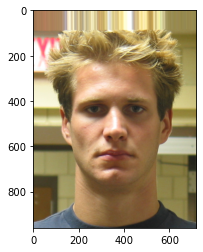

In [13]:
p1 = D.Probes[0].split(',')[0]
Ip = skimage.io.imread(mypath+p1)
plt.imshow(Ip)

In [14]:
import auxiliar as ax 

path = r'data\reference/'
photos[0]
path1 = path+photos[0]
path2 = path+photos[1]

# skimage.io.imread(path+photos[0])

# Use ArcFace to compare the socres d
s1 = ax.comparefaces(path1, path2)
s2 = ax.comparefaces(path2, path1)
s3 = ax.comparefaces(path1, path1)
s1, s2, s3

NameError: name 'photos' is not defined

In [61]:
def createDataFrame(df_o, df_c, D, reference_path, probes_path):
    """
    
    ATRIBUTES 
    ---------
    df: Original DataFrame.
    df_c: Data Frame with the conditions on the parameters.
    D: Data Frame where we are going to append the values. Has to be an empty DataFrame with the columns specified
    reference_path: Path to the reference folder to get the photos 
    probes_path: Path to the Probes folder, photos we wish to compare 
    
    """
    # Get all the files names from the probes directory 
    onlyfiles = [f for f in listdir(probes_path) if isfile(join(probes_path, f))]
    
    # Select a number of Random points with same conditions
    N = selec_pair_idx(df_tmp, 3, 0.5, reference_path=reference_path)
    
    # Counter to get rows from two by two 
    c = len(D.index.values)
    # Loop over all the randomly selected indexes 
    for idx1, idx2 in N:
        # Append the selected dataframe rows 
        D = D.append([df_o.iloc[idx1]], ignore_index = True)
        D = D.append([df_o.iloc[idx2]], ignore_index = True)
        # Obtain the names of the photos
        photo1, photo2 = D.loc[c:c+1, 'Name'].unique()
        # Create the complete path 
        path1 = reference_path+photo1
        path2 = reference_path+photo2
        # Calculate the embedding distance 
        s = ax.comparefaces(path1, path2)
        # Add the scores to the dataframe
        D.loc[c:c+1, 'Morph'] = int(c/2)
        # Set dummy variable for the groupby
        D.loc[c:c+1, 'Emb_dist'] = s
        c += 2

    # Get the photo identifier to search for matches in the probes folder
    D[['photo_id', 'extra']] = D['Name'].str.split('d', expand=True)
    
    # Get the files names of the selected photos on our DataFrame 
    for id in D.photo_id:
        ph = [file for file in onlyfiles if id in file]
        ph = ','.join(ph)
        D.loc[D.photo_id == id, 'Probes'] = ph

    return D

In [63]:
reference_path = r'data\reference/'
probe_path = mypath = r'data\probe/'
# Create a Dataframe to store Values 
idx2 = ['Emb_dist', 'Morph', 'Name', 'Sex', 'Race', 'Skin Type', 'Age']
D1 = pd.DataFrame(columns=idx2)

D1 = createDataFrame(df, df_tmp, D1, reference_path, probe_path)

In [66]:
D1

,Emb_dist,Morph,Name,Sex,Race,Skin Type,Age,photo_id,extra,Probes
0,1.142439,0.0,04317d43.png,male,caucasian,2,young,04317,43.png,04317d34.png
1,1.142439,0.0,04410d94.png,male,caucasian,2,young,04410,94.png,"04410d163.png,04410d59.png,04410d60.png"
2,0.778940,1.0,04749d08.png,male,caucasian,2,young,04749,08.png,"04749d13.png,04749d156.png,04749d157.png,04749..."
3,0.778940,1.0,04252d101.png,male,caucasian,2,young,04252,101.png,04252d84.png
4,1.688907,2.0,04410d63.png,male,caucasian,2,young,04410,63.png,"04410d163.png,04410d59.png,04410d60.png"
5,1.688907,2.0,04369d102.png,male,caucasian,2,young,04369,102.png,04369d107.png


In [21]:
# Specify conditions 
sex = 'female'
age = 'middle'
race = 'asian'
skin = '4'


# Select based on condition 
df_tmp1 = df[(df.Sex == sex) & (df.Age == age) & (df.Race == race) & (df['Skin Type'] == skin)]
df_tmp1


,Name,Sex,Race,Skin Type,Age
22,04217d167.png,female,asian,4,middle
23,04217d361.png,female,asian,4,middle
24,04217d383.png,female,asian,4,middle
28,04221d205.png,female,asian,4,middle
29,04221d377.png,female,asian,4,middle
...,...,...,...,...,...
1198,04842d90.png,female,asian,4,middle
1223,04853d100.png,female,asian,4,middle
1224,04853d16.png,female,asian,4,middle
1225,04853d74.png,female,asian,4,middle


In [22]:
D1 =  createDataFrame(df, df_tmp1, D1, reference_path, probe_path)

In [23]:
D1.groupby(['Morph', 'Emb_dist', 'Name']).sum()

Sex       Race Skin Type     Age photo_id  \
Morph Emb_dist Name                                                          
0.0   0.646345 04380d149.png    male  caucasian         2   young    04380   
               04829d94.png     male  caucasian         2   young    04829   
1.0   1.198366 04308d81.png     male  caucasian         2   young    04308   
               04407d103.png    male  caucasian         2   young    04407   
2.0   1.329605 04382d142.png    male  caucasian         2   young    04382   
               04619d49.png     male  caucasian         2   young    04619   
3.0   0.757835 04561d96.png   female      asian         4  middle    04561   
               04760d100.png  female      asian         4  middle    04760   
4.0   0.884178 04226d145.png  female      asian         4  middle    04226   
               04691d02.png   female      asian         4  middle    04691   
5.0   0.762893 04568d69.png   female      asian         4  middle    04568   
               04629d61.png   female      asian         4  middle    04629   

                                extra  \
Morph Emb_dist Name                     
0.0   0.646345 04380d149.png  149.png   
               04829d94.png    94.png   
1.0   1.198366 04308d81.png    81.png   
               04407d103.png  103.png   
2.0   1.329605 04382d142.png  142.png   
               04619d49.png    49.png   
3.0   0.757835 04561d96.png    96.png   
               04760d100.png  100.png   
4.0   0.884178 04226d145.png  145.png   
               04691d02.png    02.png   
5.0   0.762893 04568d69.png    69.png   
               04629d61.png    61.png   

                                                                         Probes  
Morph Emb_dist Name                                                              
0.0   0.646345 04380d149.png  04380d64.png,04380d65.png,04380d85.png,04380d8...  
               04829d94.png   04829d06.png,04829d60.png,04829d61.png,04829d7...  
1.0   1.198366 04308d81.png                           04308d18.png,04308d46.png  
               04407d103.png                        04407d291.png,04407d292.png  
2.0   1.329605 04382d142.png  04382d135.png,04382d140.png,04382d141.png,0438...  
               04619d49.png                                        04619d07.png  
3.0   0.757835 04561d96.png   04561d123.png,04561d129.png,04561d58.png,04561...  
               04760d100.png  04760d154.png,04760d31.png,04760d54.png,04760d...  
4.0   0.884178 04226d145.png                        04226d158.png,04226d339.png  
               04691d02.png              04691d00.png,04691d01.png,04691d25.png  
5.0   0.762893 04568d69.png   04568d53.png,04568d54.png,04568d65.png,04568d7...  
               04629d61.png   04629d160.png,04629d58.png,04629d64.png,04629d...

In [40]:
df = pd.read_csv(r'C:\Users\G531\Documents\8 - Github\Biometric-system\selected_photos.csv')
df

,Emb_dist,Morph,Name,Sex,Race,Skin Type,Age,photo_id,extra,Probes
0,1.633149,0.0,04827d72.png,male,caucasian,2,young,4827,72.png,"04827d06.png,04827d123.png,04827d131.png,04827..."
1,1.633149,0.0,04321d30.png,male,caucasian,2,young,4321,30.png,04321d60.png
2,1.407701,1.0,04507d100.png,male,caucasian,2,young,4507,100.png,"04507d220.png,04507d255.png,04507d321.png"
3,1.407701,1.0,04746d73.png,male,caucasian,2,young,4746,73.png,"04746d43.png,04746d47.png,04746d52.png,04746d6..."
4,1.112402,2.0,04331d71.png,male,caucasian,2,young,4331,71.png,"04331d29.png,04331d42.png,04331d49.png"
5,1.112402,2.0,04676d139.png,male,caucasian,2,young,4676,139.png,"04676d135.png,04676d136.png,04676d142.png"
6,0.661601,3.0,04429d106.png,female,asian,4,middle,4429,106.png,"04429d261.png,04429d354.png,04429d431.png"
7,0.661601,3.0,04842d90.png,female,asian,4,middle,4842,90.png,"04842d13.png,04842d70.png,04842d71.png,04842d9..."
8,0.828042,4.0,04822d02.png,female,asian,4,middle,4822,02.png,"04822d149.png,04822d161.png,04822d55.png,04822..."
9,0.828042,4.0,04842d02.png,female,asian,4,middle,4842,02.png,"04842d13.png,04842d70.png,04842d71.png,04842d9..."


In [43]:
df.groupby(['Morph', 'Emb_dist', 'photo_id', 'Sex', 'Race', 'Skin Type', 'Age']).sum()

Name  \
Morph Emb_dist photo_id Sex    Race      Skin Type Age                     
0.0   1.633149 4321     male   caucasian 2         young    04321d30.png   
               4827     male   caucasian 2         young    04827d72.png   
1.0   1.407701 4507     male   caucasian 2         young   04507d100.png   
               4746     male   caucasian 2         young    04746d73.png   
2.0   1.112402 4331     male   caucasian 2         young    04331d71.png   
               4676     male   caucasian 2         young   04676d139.png   
3.0   0.661601 4429     female asian     4         middle  04429d106.png   
               4842     female asian     4         middle   04842d90.png   
4.0   0.828042 4822     female asian     4         middle   04822d02.png   
               4842     female asian     4         middle   04842d02.png   
5.0   0.715048 4575     female asian     4         middle   04575d74.png   
               4633     female asian     4         middle  04633d285.png   

                                                             extra  \
Morph Emb_dist photo_id Sex    Race      Skin Type Age               
0.0   1.633149 4321     male   caucasian 2         young    30.png   
               4827     male   caucasian 2         young    72.png   
1.0   1.407701 4507     male   caucasian 2         young   100.png   
               4746     male   caucasian 2         young    73.png   
2.0   1.112402 4331     male   caucasian 2         young    71.png   
               4676     male   caucasian 2         young   139.png   
3.0   0.661601 4429     female asian     4         middle  106.png   
               4842     female asian     4         middle   90.png   
4.0   0.828042 4822     female asian     4         middle   02.png   
               4842     female asian     4         middle   02.png   
5.0   0.715048 4575     female asian     4         middle   74.png   
               4633     female asian     4         middle  285.png   

                                                                                                      Probes  
Morph Emb_dist photo_id Sex    Race      Skin Type Age                                                        
0.0   1.633149 4321     male   caucasian 2         young                                        04321d60.png  
               4827     male   caucasian 2         young   04827d06.png,04827d123.png,04827d131.png,04827...  
1.0   1.407701 4507     male   caucasian 2         young           04507d220.png,04507d255.png,04507d321.png  
               4746     male   caucasian 2         young   04746d43.png,04746d47.png,04746d52.png,04746d6...  
2.0   1.112402 4331     male   caucasian 2         young              04331d29.png,04331d42.png,04331d49.png  
               4676     male   caucasian 2         young           04676d135.png,04676d136.png,04676d142.png  
3.0   0.661601 4429     female asian     4         middle          04429d261.png,04429d354.png,04429d431.png  
               4842     female asian     4         middle  04842d13.png,04842d70.png,04842d71.png,04842d9...  
4.0   0.828042 4822     female asian     4         middle  04822d149.png,04822d161.png,04822d55.png,04822...  
               4842     female asian     4         middle  04842d13.png,04842d70.png,04842d71.png,04842d9...  
5.0   0.715048 4575     female asian     4         middle          04575d314.png,04575d315.png,04575d332.png  
               4633     female asian     4         middle  04633d118.png,04633d142.png,04633d221.png,0463...

In [136]:
from itertools import product
import itertools

# print([set(i) for i in product(['A', 'B', 'C', ], repeat=2)])
sorted([sorted(list(i)) for i in set(frozenset(i) for i in product(['A', 'B', 'C', 'D'], repeat=2)) if len(i) != 1])


[['A', 'B'], ['A', 'C'], ['A', 'D'], ['B', 'C'], ['B', 'D'], ['C', 'D']]

In [5]:
A = ['A', 'C', 'B']
sorted(A)

['A', 'B', 'C']

In [11]:
a = np.array([[], []])
err = [['A', 'B']]
a = np.append(a, err, axis=1)
a

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 1